<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Кластеризация***

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Алгоритмы кластеризации разбивают данные на группы по схожести признаков. Их часто используют для сегментации клиентов — выделения похожих групп среди клиентов без заранее известных меток. Это помогает лучше понять и работать с разными типами клиентов.

In [8]:
df = pd.read_csv('mall_customers_clustering.csv', index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


<Axes: xlabel='Income', ylabel='Score'>

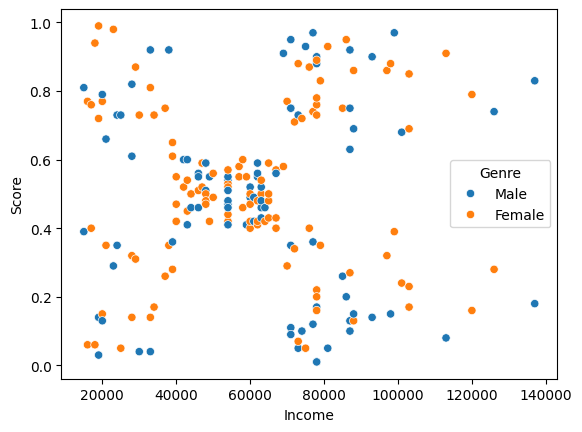

In [9]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

преобразовали категориальный атрибут в численные признаки

In [11]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

***Кластеризация К-средних***

In [12]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42).fit(X)

создаем три кластера

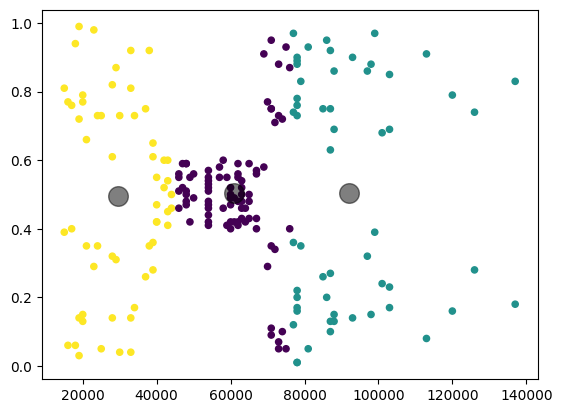

In [15]:
y_kmeans = k_means.labels_
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Для того чтобы убедиться что кол-во кластеров выбрано корректно, используем метроку качества WCSS или инерцию.

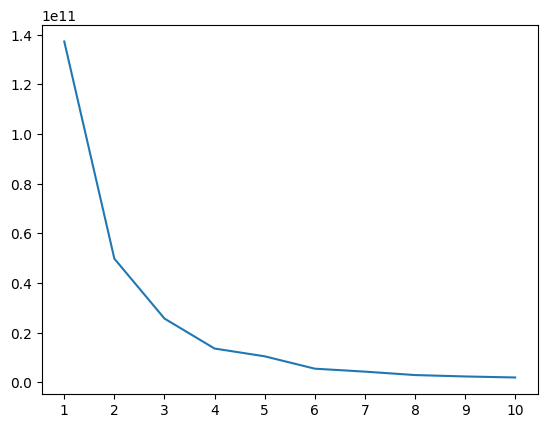

In [16]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

Сделаем общую функуцию на деление класеров и визуализацию

In [41]:
def run_kmeans(X, n_clusters=3):
    # Обучение модели
    k_means = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    y_kmeans = k_means.labels_

    # Отображение кластеров
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')

    centers = k_means.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.title(f'Кластеры (k={n_clusters})')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    # WCSS - метод локтя
    wcss = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=42).fit(X)
        wcss.append(km.inertia_)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, 11), wcss, marker='o')
    plt.xticks(range(1, 11))
    plt.title('Метод локтя')
    plt.xlabel('Количество кластеров')
    plt.ylabel('WCSS')

    plt.tight_layout()
    plt.show()

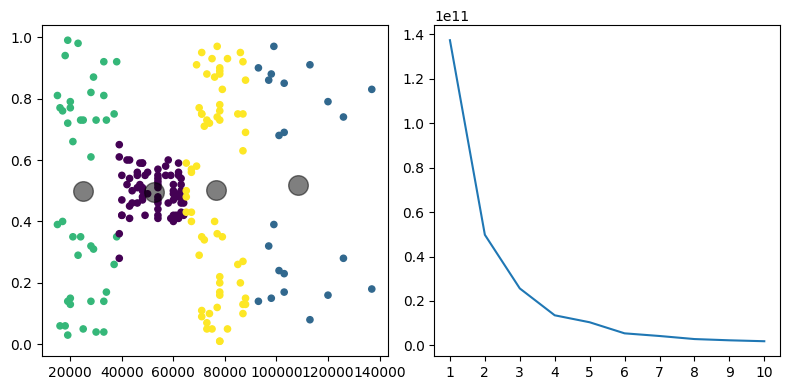

In [28]:
run_kmeans(X, n_clusters=4)

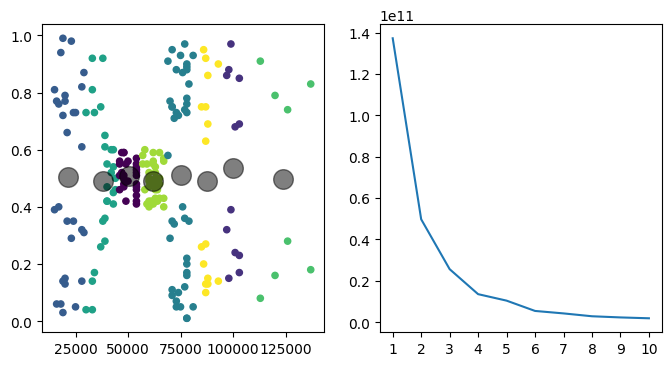

In [30]:
run_kmeans(X, n_clusters=8)

**Нормализация признаков**

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


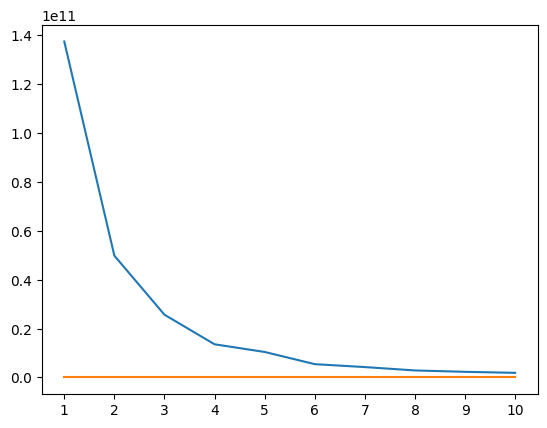

In [32]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

In [35]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

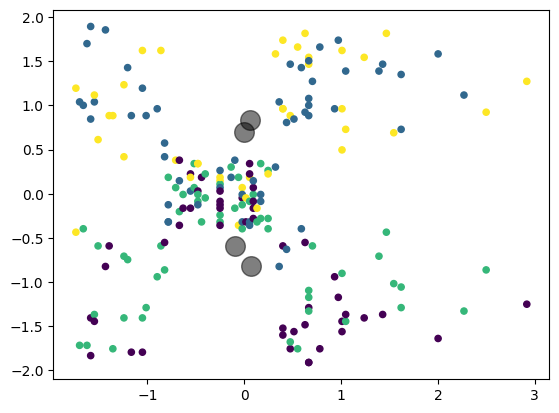

In [37]:
y_kmeans = k_means.labels_
plt.scatter(X_scaled.Income, X_scaled.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

In [38]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


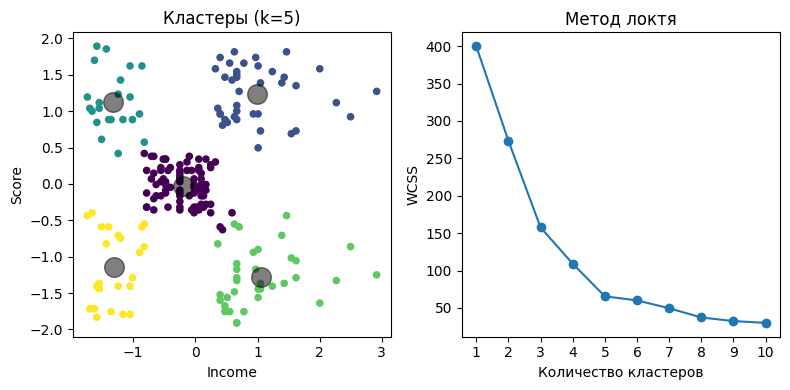

In [43]:
run_kmeans(X_flat, n_clusters=5)

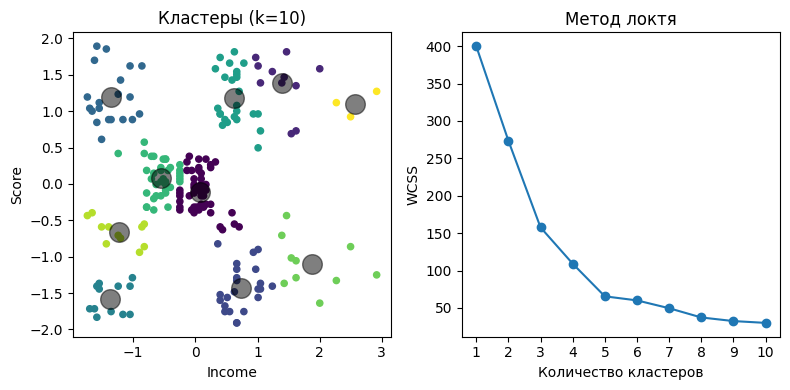

In [46]:
run_kmeans(X_flat, n_clusters=10)

In [45]:
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


In [47]:
X_flat1 = X_scaled.drop(["Income", "Score", "Genre_Male"], axis=1)
X_flat1.head()

,Age,Genre_Female
0,-1.424569,-1.128152
1,-1.281035,-1.128152
2,-1.352802,0.886405
3,-1.137502,0.886405
4,-0.563369,0.886405



Признаки: ['Income', 'Score']


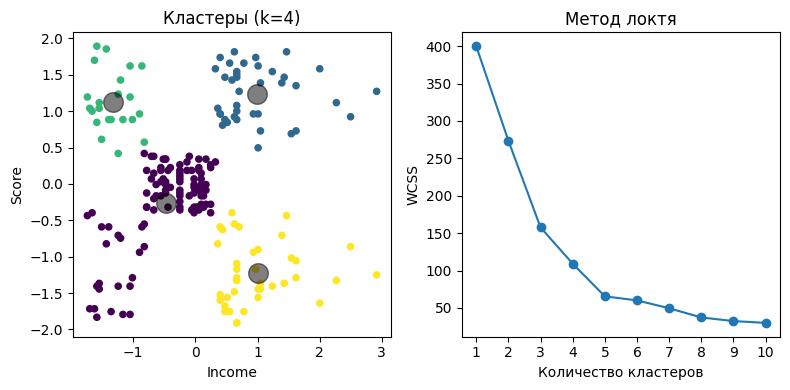

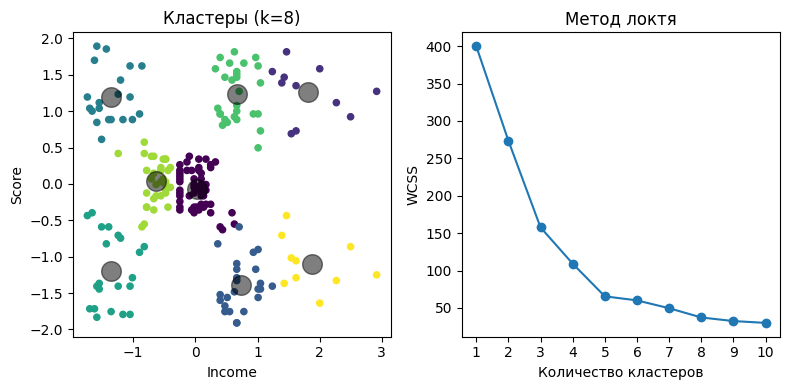


Признаки: ['Age', 'Score']


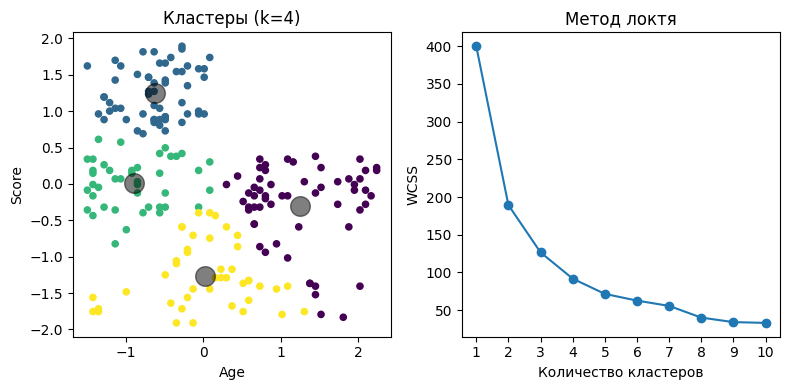

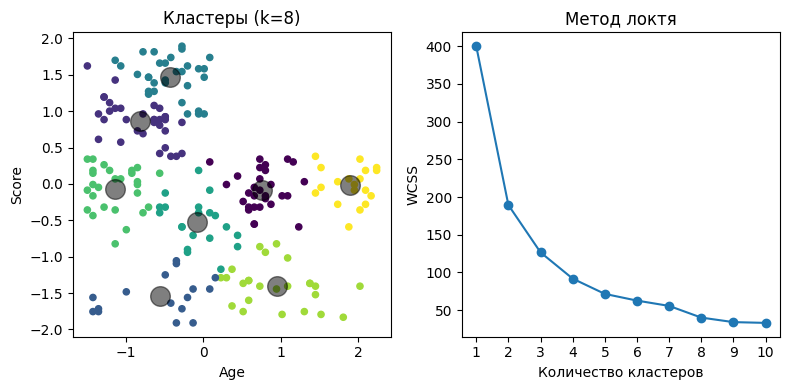


Признаки: ['Age', 'Income']


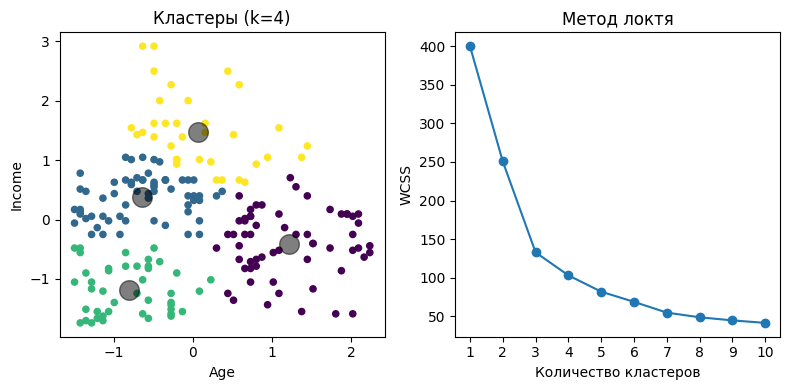

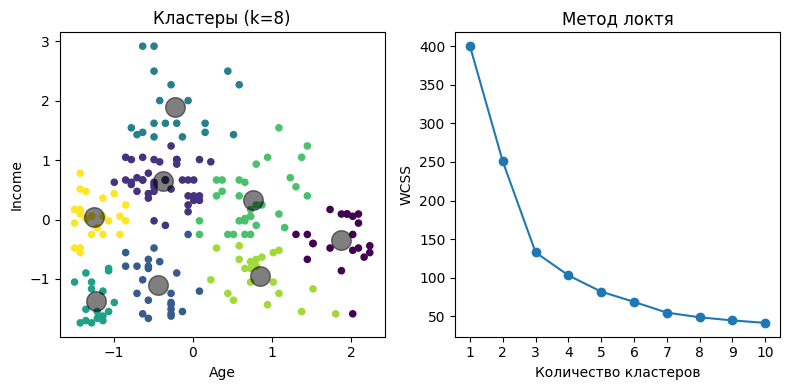

In [49]:
feature_sets = [
    ['Income', 'Score'],
    ['Age',    'Score'],
    ['Age',    'Income']
]

for feats in feature_sets:
    print('\nПризнаки:', feats)
    df = X_scaled[feats]
    run_kmeans(df, n_clusters=4)
    run_kmeans(df, n_clusters=8)

***Иерархическая кластеризация***

 Агломеративная кластеризация позволяет не только разбить выборку на опредленное число кластеров, но и построить таксономию - то есть последовательное объединение кластеров также по приниципу сходства

In [51]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [54]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

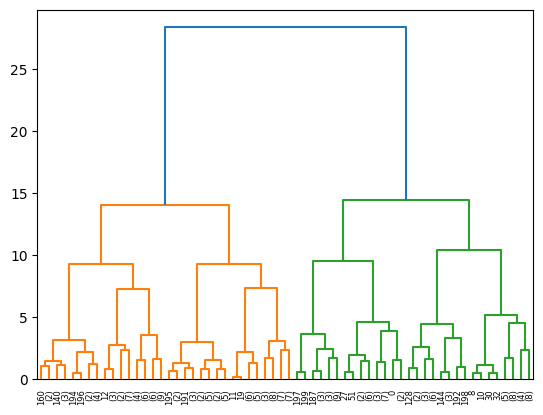

In [58]:
plot_dendrogram(model, truncate_mode="level", p=5)
#вертикаль - растояние между объектами или кластерами
#горизонталь - объекты самого датасета

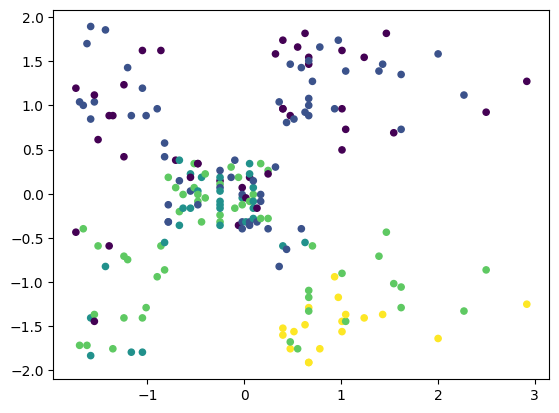

In [59]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

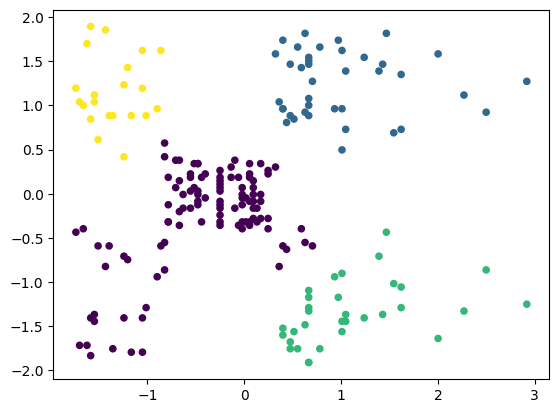

In [60]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

***DBSCAN***

DBSCAN оценивает плотность расположения точек в окрестностях заданной

In [61]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [62]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

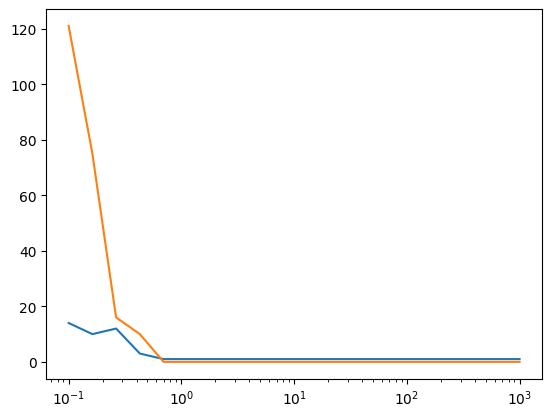

In [63]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

чем больше радиус, тем меньше и кластеров и шума получается

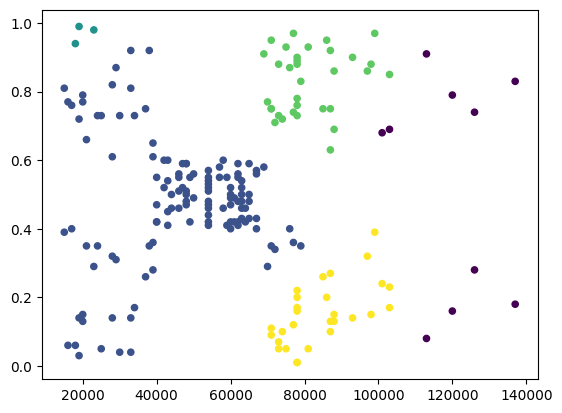

In [64]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

# ***Доп.задание***

1. Изучите и используйте для выбора количества кластеров метрику силуэт кластера (silhouette score) и другие метрики качества.

Silhouette Score – насколько хорошо точка вписывается в свой кластер.

Davies-Bouldin Index – насколько близки и компактны кластеры.

Calinski-Harabasz Index – насколько кластеры разделены и плотны.

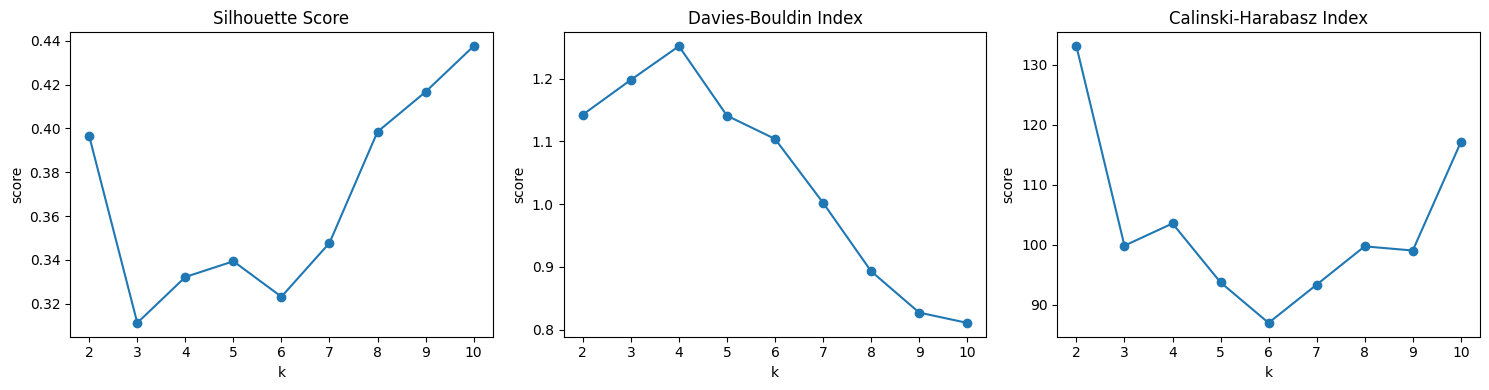

In [71]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def evaluate_kmeans(X, max_k=10):
    sil_scores = []
    db_scores = []
    ch_scores = []

    for k in range(2, max_k + 1):
        model = KMeans(n_clusters=k, random_state=42).fit(X)
        labels = model.labels_

        sil_scores.append(silhouette_score(X, labels))
        db_scores.append(davies_bouldin_score(X, labels))
        ch_scores.append(calinski_harabasz_score(X, labels))

    ks = range(2, max_k + 1)

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.plot(ks, sil_scores, marker='o')
    plt.title("Silhouette Score")
    plt.xlabel("k")
    plt.ylabel("score")

    plt.subplot(1, 3, 2)
    plt.plot(ks, db_scores, marker='o')
    plt.title("Davies-Bouldin Index")
    plt.xlabel("k")
    plt.ylabel("score")

    plt.subplot(1, 3, 3)
    plt.plot(ks, ch_scores, marker='o')
    plt.title("Calinski-Harabasz Index")
    plt.xlabel("k")
    plt.ylabel("score")

    plt.tight_layout()
    plt.show()

evaluate_kmeans(X_scaled)

2. Повторите анализ на другом датасете. Найдите датасет с осмысленными названиями точек данных, чтобы можно было вручную контролировать качество и смысл кластеризации.

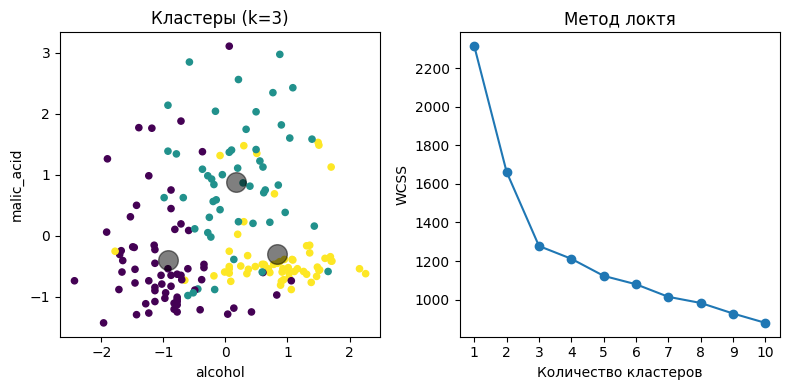

In [72]:
from sklearn.datasets import load_wine
wine = load_wine()
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target

X_wine = StandardScaler().fit_transform(df_wine.drop('target', axis=1))

run_kmeans(pd.DataFrame(X_wine, columns=wine.feature_names), n_clusters=3)


3. При построении иерархической кластеризации используйте другие метрики расстояния между кластерами и сравните результаты кластеризации и соответствующие им дендрограммы.

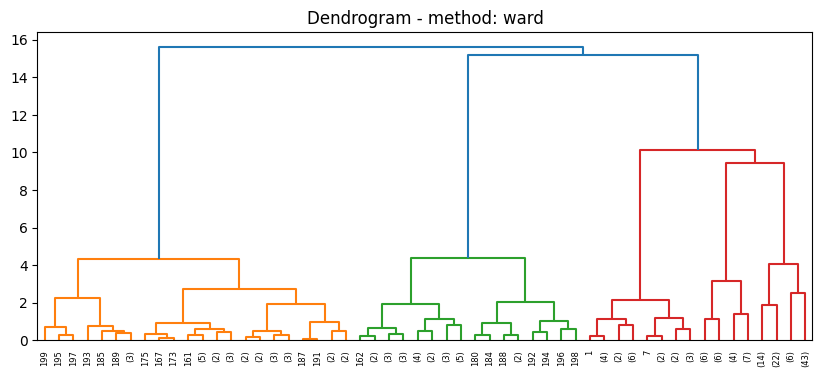

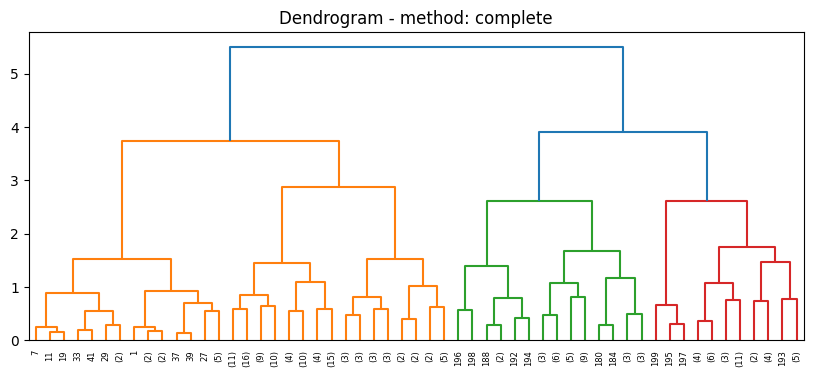

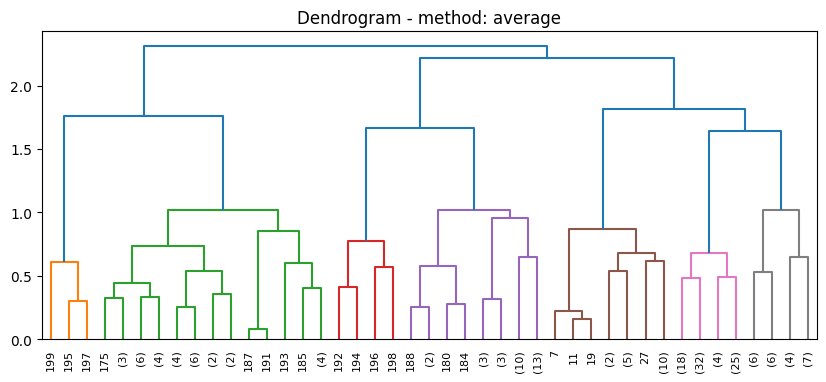

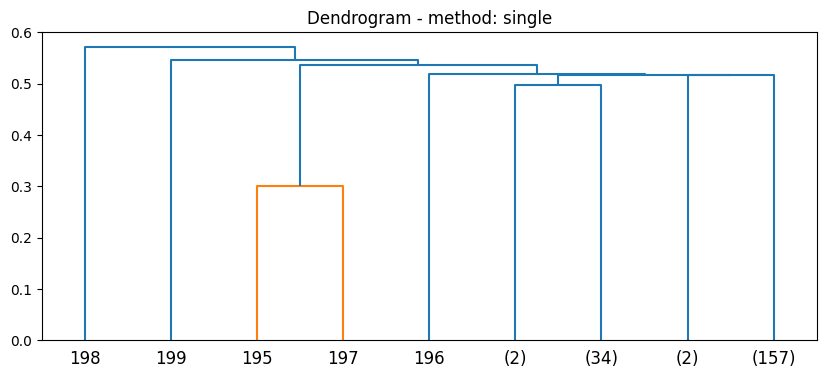

In [73]:
from scipy.cluster.hierarchy import linkage

methods = ['ward', 'complete', 'average', 'single']

for method in methods:
    Z = linkage(X_flat, method=method)
    plt.figure(figsize=(10, 4))
    dendrogram(Z, truncate_mode="level", p=5)
    plt.title(f"Dendrogram - method: {method}")
    plt.show()


4. Ознакомьтесь и примените другие методы кластеризации: HDBSCAN, OPTICS, BIRCH. В чем их особенности и сферы применения

| Характеристика                  | **HDBSCAN**                       | **OPTICS**                                   | **BIRCH**                                           |
| ------------------------------- | --------------------------------- | -------------------------------------------- | --------------------------------------------------- |
| **Тип метода**                  | Плотностной, иерархический        | Плотностной (DBSCAN-подобный, иерархический) | Иерархический, инкрементальный                      |
| **Требует k (число кластеров)** | ❌                                 | ❌                                            | ✅ (можно задать, но не обязательно)                 |
| **Обнаружение шума**            | ✅ Да (label = -1)                 | ✅ Да (label = -1)                            | ❌ Нет                                               |
| **Кластеры разной плотности**   | ✅ Хорошо                          | ✅ Очень хорошо                               | ❌ Плохо (лучше одинаковая плотность)                |
| **Выбор параметров**            | `min_cluster_size`, `min_samples` | `min_samples`, `xi`, `min_cluster_size`      | `threshold`, `branching_factor`                     |
| **Скорость / Масштабируемость** | Средняя                           | Медленнее (особенно на больших данных)       | ✅ Очень высокая (лучший для больших объемов данных) |
| **Устойчивость к шуму**         | Высокая                           | Высокая                                      | Низкая                                              |
| **Построение дендрограммы**     | Да (внутри)                       | Да (reachability plot)                       | Да (через CF-дерево)                                |
| **Подходит для больших данных** | Да, но ограниченно                | Не идеально                                  | ✅ Да (специально для этого)                         |


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


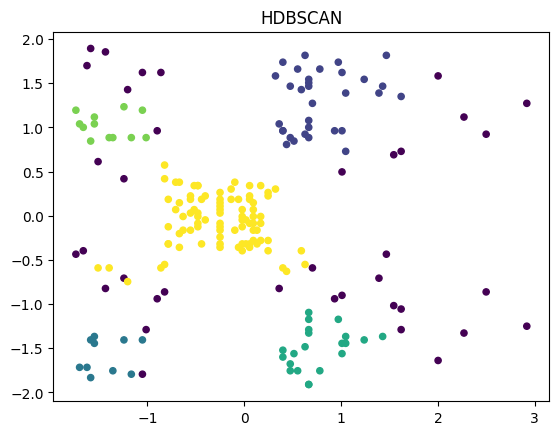

In [74]:
!pip install hdbscan

import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
labels = clusterer.fit_predict(X_flat)

plt.scatter(X_flat.Income, X_flat.Score, c=labels, cmap='viridis', s=20)
plt.title("HDBSCAN")
plt.show()


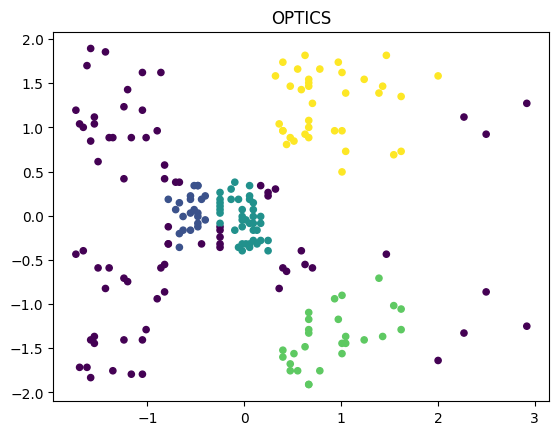

In [75]:
from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(X_flat)

plt.scatter(X_flat.Income, X_flat.Score, c=labels, cmap='viridis', s=20)
plt.title("OPTICS")
plt.show()


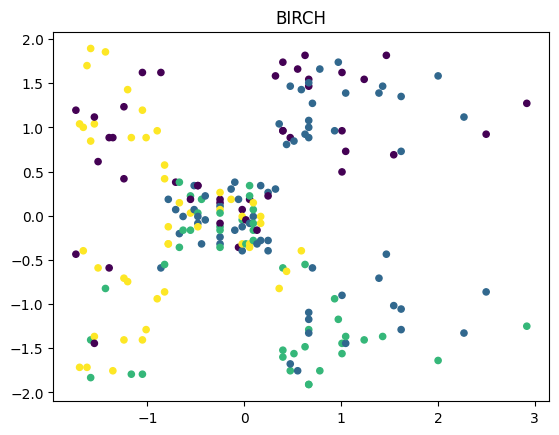

In [76]:
from sklearn.cluster import Birch

birch = Birch(n_clusters=4)
labels = birch.fit_predict(X_scaled)

plt.scatter(X_scaled.Income, X_scaled.Score, c=labels, cmap='viridis', s=20)
plt.title("BIRCH")
plt.show()
